In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sehriyarmemmedli/turboaz-cars-project")

print("Path to dataset files:", path)

100%|██████████| 240M/240M [00:14<00:00, 16.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sehriyarmemmedli/turboaz-cars-project/versions/1


In [ ]:
df = pd.read_csv(path + '/cars.csv')
df.head(3)

,id_x,car_rel_url_x,datetime_scrape,name,price_x,currency_x,datetime_product,city,day,hour,...,Sürətlər qutusu,Vəziyyəti,Yeni,Yerlərin sayı,Yürüş,Ötürücü,Şəhər,car_details_id_y,car_rel_url,extra_info
0,3c234145-d57a-4ad6-9448-d43810fc3392,/autos/8748840-hyundai-i30,2024-09-13 20:32:19.751157+00,Hyundai i30,15000.0,AZN,"Bakı, dünən 23:28",bakı,13.09.2024,23:28,...,Mexaniki,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,270 000 km,Ön,Bakı,8d84d800-fafd-4d5c-b640-f47bd6c5ac20,/autos/8748840-hyundai-i30,Yüngül lehimli disklər* ABS* Mərkəzi qapanma* ...
1,c74ea36f-6be1-4de4-926d-e117197dcf00,/autos/8475807-lada-vaz-niva-travel,2024-09-13 20:32:19.751157+00,LADA (VAZ) Niva Travel,23700.0,AZN,"Bakı, dünən 23:59",bakı,13.09.2024,23:59,...,Mexaniki,"Vuruğu yoxdur, rənglənməyib",Bəli,5,0 km,Tam,Bakı,2cf8b84b-adaf-467a-8f06-3dabcf866c8a,/autos/8475807-lada-vaz-niva-travel,Yüngül lehimli disklər* ABS* Kondisioner* Otur...
2,9cefceb0-024d-4581-a869-a3c2c68a9f95,/autos/8739686-toyota-land-cruiser,2024-09-13 20:32:19.751157+00,Toyota Land Cruiser,35600.0,$,"Bakı, dünən 23:59",bakı,13.09.2024,23:59,...,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,8+,164 750 km,Tam,Bakı,22bb3704-ebe7-4357-ba2f-1806d1a7042b,/autos/8739686-toyota-land-cruiser,Yüngül lehimli disklər* ABS* Lyuk* Mərkəzi qap...


In [ ]:
#data is very big, but have a lot duplicates
df.drop_duplicates(subset=['car_rel_url_x'], keep='last', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154030 entries, 4 to 653720
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_x                      154030 non-null  object 
 1   car_rel_url_x             154030 non-null  object 
 2   datetime_scrape           154030 non-null  object 
 3   name                      154030 non-null  object 
 4   price_x                   154030 non-null  float64
 5   currency_x                154030 non-null  object 
 6   datetime_product          154030 non-null  object 
 7   city                      154030 non-null  object 
 8   day                       154030 non-null  object 
 9   hour                      154030 non-null  object 
 10  attributes                154030 non-null  object 
 11  production_year           154030 non-null  int64  
 12  engine_displacement_num   154030 non-null  float64
 13  engine_displacement_unit  153170 non-null  object

In [ ]:
df['Yürüş'] = df['Yürüş'].str.replace(' km', '', regex=False) #This column is in the format '10 000 km', so we need to remove the space and kilometer, then convert it back to numeric format.
df['Yürüş'] = df['Yürüş'].str.replace(' ', '', regex=False)
df['Yürüş'] = df['Yürüş'].astype(float)
df[['kilometrage_num', 'Yürüş']][df['Yürüş'] != df['kilometrage_num']] #I checked which column is more accurate and corrrect.

,kilometrage_num,Yürüş
83192,743220,743250.0
98833,98000,262359.0
198138,473,473000.0
435355,0,9000.0
436376,0,80000.0
...,...,...
653188,0,36000.0
653322,0,36000.0
653355,0,18000.0
653411,0,16000.0


In [ ]:
df['kilometrage_unit'].value_counts()

,count
kilometrage_unit,
km,153170


In [ ]:
df[['attributes', 'engine_displacement_unit', 'kilometrage_num', 'engine_displacement_num', 'production_year']][df['kilometrage_unit'].isna()] #There is nulls in kilometrage unit and eng_dis_unit
#I noticed that the data in the engine and attributes columns was more accurate and more complete, so I decided to delete the extra columns and recreate them.

,attributes,engine_displacement_unit,kilometrage_num,engine_displacement_num,production_year
435355,"2023, 9 000 km",NaN,0,0.0,0
436376,"2014, 80 000 km",NaN,0,0.0,0
436441,"2024, 0 km",NaN,0,0.0,0
437012,"2023, 0 km",NaN,0,0.0,0
437024,"2023, 0 km",NaN,0,0.0,0
...,...,...,...,...,...
653355,"2020, 50 sm",NaN,0,0.0,0
653411,"2021, 16 000 km",NaN,0,0.0,0
653485,"2024, 0 km",NaN,0,0.0,0
653604,"2023, 150 sm",NaN,0,0.0,0


In [ ]:
df[['attributes', 'engine_displacement_unit', 'kilometrage_num', 'engine_displacement_num', 'production_year', 'Mühərrik']][~df['attributes'].str.contains('L')]

,attributes,engine_displacement_unit,kilometrage_num,engine_displacement_num,production_year,Mühərrik
435355,"2023, 9 000 km",NaN,0,0.0,0,536 a.g. / Elektro
436376,"2014, 80 000 km",NaN,0,0.0,0,170 a.g. / Elektro
436441,"2024, 0 km",NaN,0,0.0,0,95 a.g. / Elektro
437012,"2023, 0 km",NaN,0,0.0,0,544 a.g. / Elektro
437024,"2023, 0 km",NaN,0,0.0,0,544 a.g. / Elektro
...,...,...,...,...,...,...
653355,"2020, 50 sm",NaN,0,0.0,0,50 sm
653411,"2021, 16 000 km",NaN,0,0.0,0,580 a.g. / Elektro
653485,"2024, 0 km",NaN,0,0.0,0,204 a.g. / Elektro
653604,"2023, 150 sm",NaN,0,0.0,0,150 sm


In [ ]:
df[df['Mühərrik'].str.contains('Elektro')]

,id_x,car_rel_url_x,datetime_scrape,name,price_x,currency_x,datetime_product,city,day,hour,...,Sürətlər qutusu,Vəziyyəti,Yeni,Yerlərin sayı,Yürüş,Ötürücü,Şəhər,car_details_id_y,car_rel_url,extra_info
31,f3fe9162-761f-4d70-a44a-abe9c30fcf25,/autos/8686799-mazda-mx-30,2024-09-13 20:32:19.751157+00,Mazda MX-30,20200.0,$,"Bakı, dünən 23:48",bakı,13.09.2024,23:48,...,Reduktor,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,24500.0,Ön,Bakı,54b69110-7737-455d-ab66-9d60da1f2b9e,/autos/8686799-mazda-mx-30,Yüngül lehimli disklər* ABS* Yağış sensoru* Mə...
2200,542c3234-5889-467f-91f3-db131e52c9d0,/autos/8530694-im-l7,2024-09-13 20:32:19.751157+00,IM L7,52700.0,$,"Bakı, dünən 16:51",bakı,13.09.2024,16:51,...,Reduktor,"Vuruğu yoxdur, rənglənməyib",Bəli,NaN,0.0,Arxa,Bakı,4a5a2ce0-b786-49cb-8f72-a812adf55ed0,/autos/8530694-im-l7,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...
3365,bd377b50-2a29-4e5e-8f5c-aec7fafe6e13,/autos/8465958-volkswagen-id-4-crozz,2024-09-13 20:32:19.751157+00,Volkswagen ID.4 Crozz,27499.0,$,"Bakı, dünən 14:22",bakı,13.09.2024,14:22,...,Reduktor,"Vuruğu yoxdur, rənglənməyib",Bəli,5,0.0,Ön,Bakı,514c8105-cf25-492e-81fb-fe699288e4f3,/autos/8465958-volkswagen-id-4-crozz,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...
4415,8a286c36-7475-4d4f-a1bb-22566b7f391a,/autos/8027953-toyota-bz4x,2024-09-13 20:32:19.751157+00,Toyota bZ4X,28000.0,$,"Bakı, dünən 12:39",bakı,13.09.2024,12:39,...,Reduktor,"Vuruğu yoxdur, rənglənməyib",Bəli,5,0.0,Ön,Bakı,7dd35f8c-c917-4535-b4c6-8f099e727075,/autos/8027953-toyota-bz4x,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...
7081,7d518ef5-f6ca-4dcf-94db-0d0574525572,/autos/8778637-honda-e-ns1,2024-09-13 20:32:19.751157+00,Honda e:NS1,18999.0,$,"Sumqayıt, dünən 00:32",sumqayıt,13.09.2024,00:32,...,Reduktor,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,12100.0,Ön,Sumqayıt,95fb34c1-d548-48a3-8aa8-ef3415bfd94a,/autos/8778637-honda-e-ns1,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653090,5287b797-3075-413b-a661-0885906447b1,/autos/7953653-geely-radar-rd6,2025-01-05 20:15:21.051803,Geely Radar RD6,49900.0,AZN,"Bakı, dünən 09:52",bakı,05.01.2025,09:52,...,Reduktor,"Vuruğu yoxdur, rənglənməyib",Bəli,NaN,0.0,Arxa,Bakı,80ccae10-5a9d-4952-8863-8372844c356e,/autos/7953653-geely-radar-rd6,Yüngül lehimli disklər* ABS* Mərkəzi qapanma* ...
653322,2e7c4f78-e320-46e3-8466-b39f1f318248,/autos/8276701-porsche-taycan-4s,2025-01-05 20:15:21.051803,Porsche Taycan 4S,74000.0,$,"Bakı, dünən 09:13",bakı,05.01.2025,09:13,...,Reduktor,"Vuruğu yoxdur, rənglənməyib",Xeyr,NaN,36000.0,Tam,Bakı,b3397ea1-e9fd-4a48-be91-93b3dc8bbf80,/autos/8276701-porsche-taycan-4s,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...
653411,4b9fd81b-8a19-4e27-9e37-0b4235253956,/autos/9070688-kia-ev6,2025-01-05 20:15:21.051803,Kia EV6,42600.0,$,"Bakı, dünən 08:23",bakı,05.01.2025,08:23,...,Reduktor,"Vuruğu yoxdur, rənglənməyib",Xeyr,4,16000.0,Tam,Bakı,ffc28894-bae1-4f3c-bd18-2bd0b07361b0,/autos/9070688-kia-ev6,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...
653485,81812970-1191-4e03-9a9c-e82bef713486,/autos/8924874-byd-yuan-plus,2025-01-05 20:15:21.051803,BYD Yuan Plus,38900.0,AZN,"Sumqayıt, dünən 03:02",sumqayıt,05.01.2025,03:02,...,Reduktor,"Vuruğu yoxdur, rənglənməyib",Bəli,5,0.0,Ön,Sumqayıt,7b9de1ce-f039-433e-9a12-1f5176573f67,/autos/8924874-byd-yuan-plus,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...


In [ ]:
df[['price_x', 'currency_x', 'price_y', 'currency_y']][df['price_x'] != df['price_y']] #They are almost same, that's why there will not be a big difference whichever I delete.

,price_x,currency_x,price_y,currency_y
1413,18500.0,AZN,18000.0,AZN
4604,8300.0,AZN,7800.0,AZN
24640,8300.0,AZN,8500.0,AZN
39140,9999.0,AZN,9500.0,AZN
76287,4300.0,AZN,14300.0,AZN
...,...,...,...,...
643414,5700.0,AZN,6500.0,AZN
648019,6500.0,AZN,6000.0,AZN
649678,16500.0,AZN,16300.0,AZN
651590,17500.0,AZN,17000.0,AZN


In [ ]:
df['day'] = pd.to_datetime(df['day'], format='%d.%m.%Y') #I kept day and month from 'day' and 'hour' columns, because the interval is too short and maybe even month can't help my model.
df['month'] = df['day'].dt.month
df['day_of_month'] = df['day'].dt.day
df.drop(columns=['day', 'hour'], inplace=True)

In [ ]:
df.drop(columns=['id_x', 'car_rel_url_x', 'datetime_scrape', 'Marka', 'Model', 'price_x', 'currency_x', 'datetime_product', 'production_year', 'kilometrage_num', 'kilometrage_unit', 'engine_displacement_num', 'engine_displacement_unit', 'img_url', 'id_y', 'cars_id', 'car_rel_url_y', 'datetime', 'description', 'owner_name', 'shop_name', 'phone', 'updated', 'views', 'vin', 'car_details_id_x', 'Qəzalı', 'Şəhər', 'car_details_id_y', 'car_rel_url', 'extra_info', 'vip', 'featured'], axis=1, inplace=True)
#I dropped columns which are duplicate, unnecessary, and other ones that I will recreate.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154030 entries, 4 to 653720
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   name                      154030 non-null  object 
 1   city                      154030 non-null  object 
 2   attributes                154030 non-null  object 
 3   barter                    36599 non-null   object 
 4   loan                      23501 non-null   object 
 5   salon                     14983 non-null   object 
 6   spare_parts               1069 non-null    object 
 7   price_y                   154030 non-null  float64
 8   currency_y                154030 non-null  object 
 9   Ban növü                  154030 non-null  object 
 10  Buraxılış ili             154030 non-null  int64  
 11  Hansı bazar üçün yığılıb  109941 non-null  object 
 12  Mühərrik                  154030 non-null  object 
 13  Rəng                      154030 non-null  object

In [ ]:
df['attributes']

,attributes
4,"2007, 1.5 L, 354 000 km"
10,"2012, 1.5 L, 233 675 km"
16,"1985, 1.6 L, 30 000 km"
18,"2000, 1.8 L, 450 000 km"
20,"2013, 1.4 L, 340 000 km"
...,...
653716,"2008, 1.5 L, 320 000 km"
653717,"2011, 2.9 L, 155 000 km"
653718,"2018, 2.0 L, 77 926 km"
653719,"1999, 4.7 L, 250 000 km"


In [ ]:
#This function extracts engine size from a string containing numerical values followed by "L" (liters) or "sm" (cubic centimeters),
#converting "sm" to liters by dividing by 1000, and applies it to the 'attributes' column of the dataframe.
import re
def extract_engine_size(attr):
    match = re.search(r'([\d\.]+)\s*(L|sm)', attr)
    if match:
        value, unit = match.groups()
        return float(value) if unit == "L" else float(value) / 1000
    return None
df['engine_size_L'] = df['attributes'].apply(extract_engine_size)

In [ ]:
#This line removes any rows where the engine size is 20 liters or more, helping to filter out unrealistic or incorrect data points.
df = df[df['engine_size_L'] < 20]

In [ ]:
#These functions extract horsepower (as an integer) and fuel type (as a string) from the 'Mühərrik' column using regex and string splitting.
def extract_horsepower(engine_info):
    match = re.search(r'(\d+)\s*a\.g\.', engine_info)
    return int(match.group(1)) if match else None

def extract_fuel_type(engine_info):
    parts = engine_info.split("/")
    return parts[-1].strip() if len(parts) > 2 else None

df['horsepower'] = df['Mühərrik'].apply(extract_horsepower)
df['fuel_type'] = df['Mühərrik'].apply(extract_fuel_type)

In [ ]:
df['fuel_type'].value_counts()

,count
fuel_type,
Benzin,103698
Dizel,36308
Hibrid,9668
Plug-in Hibrid,2805
Elektro,544
Qaz,132
Hidrogen,1


In [ ]:
df = df[df['horsepower'] < 1000]

In [ ]:
df.drop(columns = ['attributes', 'Mühərrik'], axis=1, inplace=True)

<ipython-input-21-4a5fad9adea2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['attributes', 'Mühərrik'], axis=1, inplace=True)


In [ ]:
#These lines clean and convert the "Sahiblər" (Owners) and "Yerlərin sayı" (Number of Seats) columns by removing unnecessary text (like "və daha çox" and "+"), then converting them to numerical values for easier analysis.#
df['Sahiblər'] = df['Sahiblər'].str.replace(' və daha çox', '')
df['Sahiblər'] = df['Sahiblər'].astype(float)

<ipython-input-22-88e16e189e67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sahiblər'] = df['Sahiblər'].str.replace(' və daha çox', '')
<ipython-input-22-88e16e189e67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sahiblər'] = df['Sahiblər'].astype(float)


In [ ]:
df['Yerlərin sayı'] = df['Yerlərin sayı'].str.replace('+', '')
df['Yerlərin sayı'] = df['Yerlərin sayı'].astype(float)

<ipython-input-23-8b341697b424>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Yerlərin sayı'] = df['Yerlərin sayı'].str.replace('+', '')


In [ ]:
df['currency_y'].value_counts()

,count
currency_y,
AZN,133687
USD,19201
EUR,226


In [ ]:
#This code converts car prices into Azerbaijani Manat (AZN) using predefined exchange rates, then removes the original price and currency columns, leaving only the converted price.
exchange_rates = {'AZN': 1, 'USD': 1.7, 'EUR': 1.76}
df['price'] = df['price_y'] * df['currency_y'].map(exchange_rates)
df.drop(columns=['price_y', 'currency_y'], inplace=True)
df['price']

,price
4,10500.0
10,8000.0
16,5800.0
18,9500.0
20,21300.0
...,...
653716,10800.0
653717,9500.0
653718,25400.0
653719,10600.0


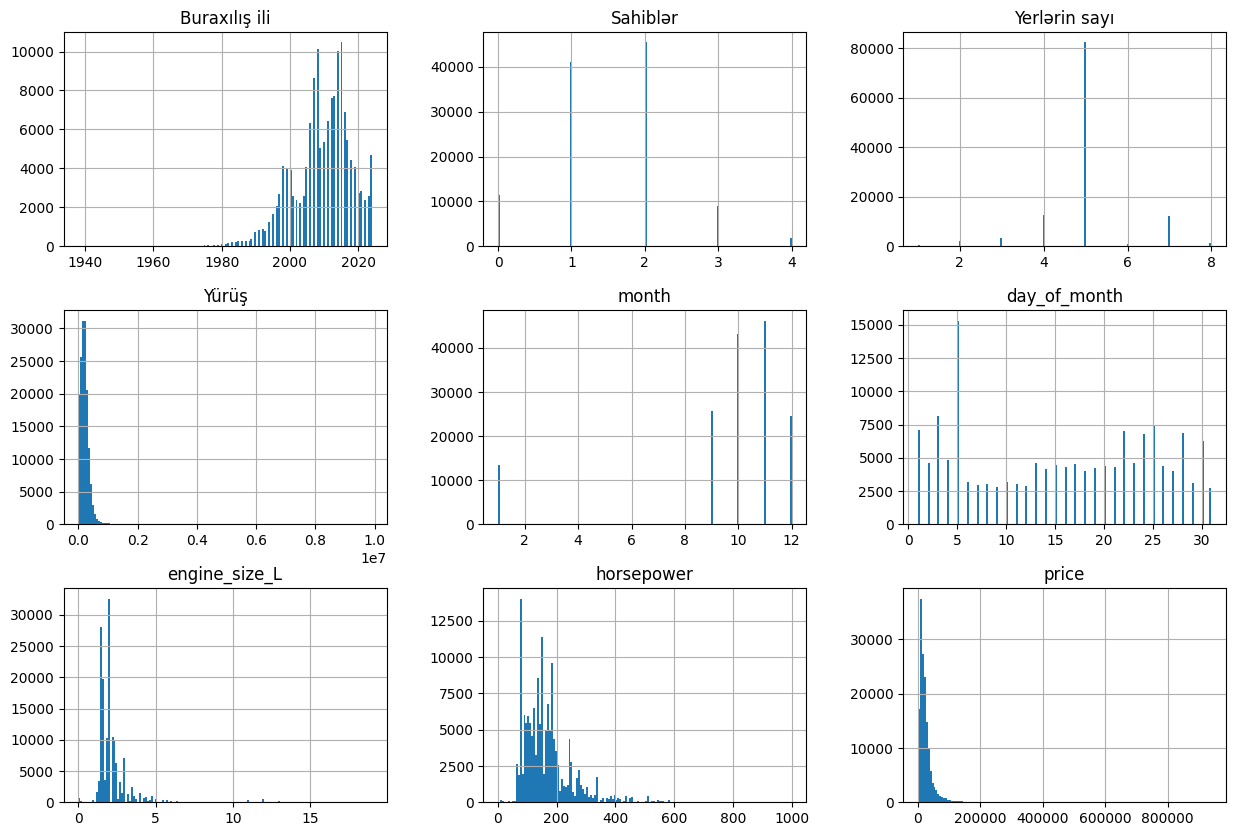

In [ ]:
df.hist(bins = 150, figsize=(15,10))
plt.show()

In [ ]:
df = df[df['Yürüş'] < 1000000]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152705 entries, 4 to 653720
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   name                      152705 non-null  object 
 1   city                      152705 non-null  object 
 2   barter                    36244 non-null   object 
 3   loan                      23256 non-null   object 
 4   salon                     14607 non-null   object 
 5   spare_parts               1066 non-null    object 
 6   Ban növü                  152705 non-null  object 
 7   Buraxılış ili             152705 non-null  int64  
 8   Hansı bazar üçün yığılıb  108971 non-null  object 
 9   Rəng                      152705 non-null  object 
 10  Sahiblər                  108482 non-null  float64
 11  Sürətlər qutusu           152705 non-null  object 
 12  Vəziyyəti                 152702 non-null  object 
 13  Yeni                      152705 non-null  object

In [ ]:
df['city'].value_counts()

,count
city,
bakı,108203
sumqayıt,10633
gəncə,6385
lənkəran,1352
xırdalan,1286
...,...
liman,1
zəngilan,1
xocalı,1


In [ ]:
#This code applies K-means clustering to classify cities into three price categories (high, mid, and low) based on the average car price in each city,
#then maps the resulting clusters back to the original dataset, and calculates the correlation between the cluster labels and the car prices.
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Calculate the average price for each city
city_avg_price = df.groupby('city')['price'].mean().reset_index()

# Standardize the prices (important for clustering)
scaler = StandardScaler()
city_avg_price['scaled_price'] = scaler.fit_transform(city_avg_price[['price']])

# Apply K-means clustering (Choose 3 clusters: High, Mid, Low price cities)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
city_avg_price['city_cluster'] = kmeans.fit_predict(city_avg_price[['scaled_price']])

# Map cluster labels back to the main dataframe
df = df.merge(city_avg_price[['city', 'city_cluster']], on='city', how='left')

# Drop the original 'city' column if needed
df.drop(columns=['city'], inplace=True)

correlation = df['city_cluster'].corr(df['price'])
print(f"Correlation between City Cluster and Price: {correlation}")

Correlation between City Cluster and Price: 0.2139827815925561


In [ ]:
df['Rəng'].value_counts()

,count
Rəng,
Ağ,45781
Qara,37477
Gümüşü,19500
Yaş Asfalt,12517
Göy,12453
Boz,7842
Tünd qırmızı,3074
Qırmızı,2957
Yaşıl,2663


In [ ]:
#converting some columns to binary
df['loan'][df['loan'] == 'Kreditdədir'] = '1'
df['loan'].fillna('0', inplace=True)
df['loan'] = df['loan'].astype(int)

<ipython-input-32-fd8e0a9d3f0d>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['loan'][df['loan'] == 'Kreditdədir'] = '1'
<ipython-input-32-fd8e0a9d3f0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [ ]:
correlation = df['loan'].corr(df['price'])
print(f"Correlation between Loan and Price: {correlation}")

Correlation between Loan and Price: 0.05781867251149086


In [ ]:
df['barter'][df['barter'] == 'Barter mümkündür'] = '1'
df['barter'].fillna('0', inplace=True)
df['barter'] = df['barter'].astype(int)

correlation = df['barter'].corr(df['price'])
print(f"Correlation between Barter and Price: {correlation}")

Correlation between Barter and Price: 0.13063596219126913


<ipython-input-34-4d0b60b1b629>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['barter'][df['barter'] == 'Barter mümkündür'] = '1'
<ipython-input-34-4d0b60b1b629>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [ ]:
df['salon'][df['salon'] == 'Salon'] ='1'
df['salon'].fillna('0', inplace=True)
df['salon'] = df['salon'].astype(int)

correlation = df['salon'].corr(df['price'])
print(f"Correlation between Salon and Price: {correlation}")

Correlation between Salon and Price: 0.31595376356453114


<ipython-input-35-9e3e60ba999d>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['salon'][df['salon'] == 'Salon'] ='1'
<ipython-input-35-9e3e60ba999d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [ ]:
df['spare_parts'][df['spare_parts'] == 'Qəzalı'] = '1'
df['spare_parts'].fillna('0', inplace=True)
df['spare_parts'] = df['spare_parts'].astype(int)

<ipython-input-36-3eb09c4e5e3b>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['spare_parts'][df['spare_parts'] == 'Qəzalı'] = '1'
<ipython-input-36-3eb09c4e5e3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [ ]:
df['Sürətlər qutusu'].value_counts()

,count
Sürətlər qutusu,
Avtomat,98515
Mexaniki,40730
Variator,10794
Robot,1533
Reduktor,1133


In [ ]:
df['Sahiblər'].value_counts()

,count
Sahiblər,
2.0,45314
1.0,41094
0.0,11356
3.0,8949
4.0,1769


In [ ]:
df['Yeni'].value_counts()

,count
Yeni,
Xeyr,148264
Bəli,4441


In [ ]:
#checking columns correlation
df['market_target'] = df.groupby('Hansı bazar üçün yığılıb')['price'].transform('mean')
print(df[['market_target', 'price']].corr())

               market_target     price
market_target       1.000000  0.321425
price               0.321425  1.000000


In [ ]:
df['market_target'] = df.groupby('Rəng')['price'].transform('mean')
print(df[['market_target', 'price']].corr())

               market_target     price
market_target       1.000000  0.231995
price               0.231995  1.000000


In [ ]:
df.drop(columns = 'market_target', axis=1, inplace=True)

In [ ]:
df[df['Vəziyyəti'].isna()]

,name,barter,loan,salon,spare_parts,Ban növü,Buraxılış ili,Hansı bazar üçün yığılıb,Rəng,Sahiblər,...,Yerlərin sayı,Yürüş,Ötürücü,month,day_of_month,engine_size_L,horsepower,fuel_type,price,city_cluster
2723,GAZ M-21,1,1,0,0,Kabriolet,1960,NaN,Ağ,0.0,...,NaN,123456.0,Ön,9,14,2.4,76.0,Benzin,42500.0,2
36279,Toyota Camry,0,0,0,0,Sedan,2020,NaN,Boz,0.0,...,NaN,38000.0,Ön,10,8,2.5,181.0,Benzin,49300.0,2
102919,Ssang Yong Korando,1,0,0,0,"Offroader / SUV, 5 qapı",2013,Rəsmi diler,Ağ,2.0,...,NaN,180000.0,Tam,11,23,2.0,149.0,Benzin,20000.0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152705 entries, 0 to 152704
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   name                      152705 non-null  object 
 1   barter                    152705 non-null  int64  
 2   loan                      152705 non-null  int64  
 3   salon                     152705 non-null  int64  
 4   spare_parts               152705 non-null  int64  
 5   Ban növü                  152705 non-null  object 
 6   Buraxılış ili             152705 non-null  int64  
 7   Hansı bazar üçün yığılıb  108971 non-null  object 
 8   Rəng                      152705 non-null  object 
 9   Sahiblər                  108482 non-null  float64
 10  Sürətlər qutusu           152705 non-null  object 
 11  Vəziyyəti                 152702 non-null  object 
 12  Yeni                      152705 non-null  object 
 13  Yerlərin sayı             115078 non-null  f

In [ ]:
#This code calculates the mean car price for each category in the training set (df_train), then maps these mean values to both the training and testing sets.
#Target encoding is used here to replace categorical values with the mean price for each category, helping the model to better understand the relationship between categorical features and the target (car price).
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=100000, random_state=42)
target_encoding_features = ['name', 'Hansı bazar üçün yığılıb', 'Ban növü', 'Rəng']

def target_encoding(column):
  name_mean_price_train = df_train.groupby(column)['price'].mean()
  df[column] = df[column].map(name_mean_price_train)
  df_train[column] = df_train[column].map(name_mean_price_train)
  df_test[column] = df_test[column].map(name_mean_price_train)
for feature in target_encoding_features:
  target_encoding(feature)

In [ ]:
df = pd.DataFrame(df)
df_train = pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)

In [ ]:
#This code preprocesses the dataset by handling missing values, scaling numerical features, one-hot encoding categorical features, and ensuring consistency between training and testing sets for machine learning models.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

donttouch_cols = ['loan', 'barter', 'salon', 'spare_parts', 'city_cluster']
numerical_features = ['Buraxılış ili', 'Yerlərin sayı', 'Yürüş', 'engine_size_L', 'horsepower', 'month', 'day_of_month', 'Sahiblər', 'name', 'Hansı bazar üçün yığılıb', 'Ban növü', 'Rəng']
categorical_features = ['Sürətlər qutusu', 'Vəziyyəti', 'Ötürücü', 'fuel_type', 'Yeni']
target = ['price']

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
], remainder='passthrough')

df = pd.DataFrame(preprocessor.fit_transform(df), columns = preprocessor.get_feature_names_out())
df_train = pd.DataFrame(preprocessor.transform(df_train), columns = preprocessor.get_feature_names_out())
df_test = pd.DataFrame(preprocessor.fit_transform(df_test), columns = preprocessor.get_feature_names_out())

#I apply preprocessor for train and test independantly, because target encoding needs train dataset.
#That's why test dataset doesn't contain Hidrogen fuel type column from onehot
df_test['cat__fuel_type_Hidrogen'] = np.zeros(len(df_test))
current_columns = df_test.columns.tolist()
new_column_index = 28
current_columns.remove('cat__fuel_type_Hidrogen')
current_columns.insert(new_column_index, 'cat__fuel_type_Hidrogen')
df_test = df_test[current_columns]

In [ ]:
df

,num__Buraxılış ili,num__Yerlərin sayı,num__Yürüş,num__engine_size_L,num__horsepower,num__month,num__day_of_month,num__Sahiblər,num__name,num__Hansı bazar üçün yığılıb,...,cat__fuel_type_Plug-in Hibrid,cat__fuel_type_Qaz,cat__Yeni_Bəli,cat__Yeni_Xeyr,remainder__barter,remainder__loan,remainder__salon,remainder__spare_parts,remainder__price,remainder__city_cluster
0,-0.310043,-0.025762,1.050080,-0.604694,-1.070455,-0.234056,-0.263896,0.449662,-0.480829,0.117935,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10500.0,2.0
1,0.286670,-0.025762,0.166918,-0.604694,-1.070455,-0.234056,-0.263896,0.449662,-0.704961,-1.988920,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8000.0,0.0
2,-2.935577,-0.025762,-1.328016,-0.510494,-1.082372,-0.234056,-0.263896,0.449662,-0.860625,-1.988920,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5800.0,0.0
3,-1.145440,2.303424,1.754700,-0.322095,-0.593776,-0.234056,-0.263896,0.449662,-0.605466,-0.271825,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9500.0,1.0
4,0.406012,-0.025762,0.947322,-0.698894,-0.295851,-0.234056,-0.263896,0.449662,-0.434842,0.117935,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,21300.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152700,-0.190700,-0.025762,0.800526,-0.604694,-1.070455,-3.043593,-1.113374,0.449662,-0.480829,-0.271825,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,10800.0,2.0
152701,0.167327,-0.025762,-0.410541,0.714101,-0.367353,-3.043593,-1.113374,-2.226370,-0.451673,-0.271825,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9500.0,0.0
152702,1.002725,-0.025762,-0.976249,-0.133696,-0.188598,-3.043593,-1.113374,-2.226370,-0.102854,-0.271825,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25400.0,2.0
152703,-1.264783,-0.025762,0.286740,2.409695,1.098438,-3.043593,-1.113374,0.449662,0.493527,0.117935,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,10600.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152705 entries, 0 to 152704
Data columns (total 39 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   num__Buraxılış ili                          152705 non-null  float64
 1   num__Yerlərin sayı                          152705 non-null  float64
 2   num__Yürüş                                  152705 non-null  float64
 3   num__engine_size_L                          152705 non-null  float64
 4   num__horsepower                             152705 non-null  float64
 5   num__month                                  152705 non-null  float64
 6   num__day_of_month                           152705 non-null  float64
 7   num__Sahiblər                               152705 non-null  float64
 8   num__name                                   152705 non-null  float64
 9   num__Hansı bazar üçün yığılıb               152705 non-null  float64
 

In [ ]:
df_val, df_test = train_test_split(df_test, train_size=0.5, random_state=40)

In [ ]:
df[df.select_dtypes(include=['float64']).columns] = df[df.select_dtypes(include=['float64']).columns].astype('float32')

In [ ]:
#data is very big, that's why I used only 50000of them in training and then it also gave ram error
#then, I first checked 0.2 its score was 0.9, but in some big values it can't predict well, best result i got on 0.5 fraction, 25000data
df_train_sample = df_train.sample(frac=0.5, random_state=42)

In [ ]:
target = ['remainder__price']
X_train = df_train_sample.drop(columns=target)
y_train = df_train_sample[target]
X_val = df_val.drop(columns=target)
y_val = df_val[target]
X_test = df_test.drop(columns=target)
y_test = df_test[target]

In [ ]:
y_val.describe()

,remainder__price
count,26352.000000
mean,25283.710383
std,29989.942419
min,500.000000
25%,10800.000000
50%,17800.000000
75%,29000.000000
max,629000.000000


In [ ]:
X_train.shape

(100000, 38)

In [ ]:
#This is baseline model and it scores ~0.64 and has mean absolute error of ~7650
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

cross_val_score(lin_reg, X_val, y_val, cv=5, scoring='neg_mean_absolute_error'), cross_val_score(lin_reg, X_val, y_val, cv=5, scoring='r2')

(array([-7615.49444064, -7486.46624184, -7368.01146162, -7260.63899517,
        -7242.57857341]),
 array([0.69176798, 0.65907946, 0.70598169, 0.69785027, 0.69713262]))

In [ ]:
#I used polynomial features because relatitionship between columns are non-linear.
#But we have 39 columns, this means 39 parametres, each one of them having more than 2 degree of polynomial becomes exponentially complex that's why e ran out of RAM.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge())
])

#I ran the code multiple times tofind best alpha and best result is one of the 750-850 from epending on how many data I used and randomness
param_grid = {
    'ridge__alpha': [750, 800, 850]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', n_jobs=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R2:", -grid_search.best_score_)

cross_val_score(grid_search.best_estimator_, X_val, y_val, cv=5, scoring='neg_mean_absolute_error')

Best Parameters: {'ridge__alpha': 750}
Best R2: -0.846118363999564


array([-5941.64636612, -5960.71924854, -5965.7740197 , -6243.16875521,
       -5745.9144744 ])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf_reg = RandomForestRegressor(random_state=42)

#It took a lot of time to run this code everytime that's why I didn't use many n_estimators and used RandomizedSearch
param_dist_rf = {
    'n_estimators': np.arange(50, 201, 50),
    'max_depth': np.arange(5, 21, 5),
    'min_samples_split': np.arange(2, 11, 1),
    'min_samples_leaf': np.arange(1, 11, 1),
    'bootstrap': [True, False]
}

rf_random_search = RandomizedSearchCV(rf_reg, param_distributions=param_dist_rf, n_iter=100, cv=3, n_jobs=-1, random_state=42)
rf_random_search.fit(X_train, y_train)

print("Random Forest Best Parameters:", rf_random_search.best_params_)
print("Random Forest Best Score:", rf_random_search.best_score_)

In [ ]:
best_rf_model = rf_random_search.best_estimator_

In [ ]:
cross_val_score(best_rf_model, X_val, y_val, cv=5, scoring='neg_mean_absolute_error'), cross_val_score(best_rf_model, X_val, y_val, cv=5, scoring='r2')

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

#Also same thing as RandomForest, it took a lot of time that's why I used RandomizedSearch
gb_reg = GradientBoostingRegressor(random_state=42)
param_dist_gb = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'max_depth': np.arange(3, 11, 2),
    'min_samples_split': np.arange(2, 11, 1)
}

gb_random_search = RandomizedSearchCV(gb_reg, param_distributions=param_dist_gb, n_iter=100, cv=3, n_jobs=-1, random_state=42)
gb_random_search.fit(X_train, y_train)

print("Gradient Boosting Best Parameters:", gb_random_search.best_params_)
print("Gradient Boosting Best Score:", gb_random_search.best_score_)

In [ ]:
best_gb_model = gb_random_search.best_estimator_

In [ ]:
cross_val_score(best_gb_model, X_val, y_val, cv=5, scoring='neg_mean_absolute_error'), cross_val_score(best_gb_model, X_val, y_val, cv=5, scoring='r2')

In [ ]:
!pip install xgboost

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

#Some column names had special characters.
X_train.columns = X_train.columns.str.replace(r'[^A-Za-z0-9]+', '_', regex=True)
X_test.columns = X_test.columns.str.replace(r'[^A-Za-z0-9]+', '_', regex=True)

lgb_reg = lgb.LGBMRegressor(random_state=42)

#Also in this model, I used 5 parametres and different values for them. They had 450 combinations, but that could take hours, that's why I also used RandomizedSearch
param_dist_lgb = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': np.arange(3, 11, 2),
    'num_leaves': [31, 63, 127],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

lgb_random_search = RandomizedSearchCV(lgb_reg, param_distributions=param_dist_lgb, n_iter=100, cv=3, n_jobs=-1, random_state=42)
lgb_random_search.fit(X_train, y_train)

print("LightGBM Best Parameters:", lgb_random_search.best_params_)
print("LightGBM Best Score:", lgb_random_search.best_score_)

In [ ]:
best_lgb_model = lgb_random_search.best_estimator_

In [ ]:
X_val.columns = X_val.columns.str.replace(r'[^A-Za-z0-9]+', '_', regex=True)
cross_val_score(best_lgb_model, X_val, y_val, cv=5, scoring='neg_mean_absolute_error'), cross_val_score(best_lgb_model, X_val, y_val, cv=5, scoring='r2')

In [ ]:
from xgboost import XGBRegressor

#This is strong model, but doesn't have configurable parametres
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
xgb_reg.score(X_val, y_val)

In [ ]:
from sklearn.ensemble import StackingRegressor

#I used best models that I could get, and made stacking classifier, but result didn't end up quite good.
stacking_model = StackingRegressor(
    estimators=[
        ('rf', best_rf_model),
        ('gbr', best_gb_model),
        ('lgb', best_lgb_model)
    ],
    final_estimator=LinearRegression()
)

stacking_model.fit(X_train, y_train)
stacking_model.score(X_val, y_val), cross_val_score(stacking_model, X_val, y_val, cv=5, scoring='neg_mean_absolute_error'), cross_val_score(stacking_model, X_val, y_val, cv=5, scoring='r2')

In [ ]:
#This is the best scoring model that I could get.
best_gb_model.fit(X_train, y_train)
y_pred = best_gb_model.predict(X_test)

print("First 10 predictions:", y_pred[:10])
print(y_test[:10])
#Based on what we see from predictions, the model's training set is not big enough to precisely predict higher values but in general, model scores quite good.

In [ ]:
#This is scores on test case
cross_val_score(best_gb_model, X_test, y_test, cv=10, scoring='neg_mean_absolute_error'), cross_val_score(best_gb_model, X_test, y_test, cv=10, scoring='r2')

In [ ]:
import matplotlib.pyplot as plt

# Fit the model and make predictions
best_gb_model.fit(X_train, y_train)
y_pred = best_gb_model.predict(X_test)

# Plotting the actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line of perfect prediction
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.show()
#From this graph we can see that how much predictions being close to perfect line more precise model is.